In [95]:
import os
import scipy as sp
from postProcessing.importData import *

NAMES = ['64cl_sv_p10', '64cl_sv_p15', '64cl_sv_p18', '64cl_sv_p20', '64cl_sv_p23', 
         '64cl_sv_p25', '64cl_sv_p27', '64cl_sv_p30', '64cl_sv_p33', '64cl_sv_p35', '64cl_sv_p37', '64cl_sv_p40','64cl_sv_p45']
data = [None] * len(NAMES)

In [96]:
for i, name in enumerate(NAMES):
    PATH = "./simulations/" + name
    if(os.path.isdir(name)):
        print("Enter a valid file name")
    else:
        PATH += ".h5"
        data[i] = dataProcessing(PATH)
    data[i].printHamiltonian()

b'float'
SELF CONSISTENT [GAUGE, HARTREE]  ==> [True, False]
The current simulation does not export HoppingFields
Note: Magnetic free energy density not added to free energy density because defined on plaquettes
COMMON VARIABLES:
T    ==>  0.26431718468666077
q    ==>  0.800000011920929
Bext ==>  (0., 0., 0.)
Emax ==>  21.020000457763672
[Component 1, Component 2]
t_x  ==>  [1.+0.j 1.+0.j]
t_y  ==>  [1.+0.j 1.+0.j]
mu   ==>  [0. 0.]
h    ==>  [0. 0.]
Coupling matrix V:
 2.5  0.01  
0.01   2.2  
Inverse of V:
   0.400007  -0.00181821  
-0.00181821     0.454554  
detV ==> 5.49990011921376
b'float'
SELF CONSISTENT [GAUGE, HARTREE]  ==> [True, False]
The current simulation does not export HoppingFields
Note: Magnetic free energy density not added to free energy density because defined on plaquettes
COMMON VARIABLES:
T    ==>  0.26431718468666077
q    ==>  0.800000011920929
Bext ==>  (0., 0., 0.)
Emax ==>  21.020000457763672
[Component 1, Component 2]
t_x  ==>  [1.+0.j 1.+0.j]
t_y  ==>  [1.

In [97]:
NAME_V = "64cl_sv_2-2" 
NAME_U = '64cl_u_s3'
   

PATH = "./simulations/" + NAME_V
if(os.path.isdir(NAME_V)):
    print("Enter a valid file name")
else:
    PATH += ".h5"
    data_v = dataProcessing(PATH)

PATH = "./simulations/" + NAME_U
if(os.path.isdir(NAME_U)):
    print("Enter a valid file name")
else:
    PATH += ".h5"
    data_u = dataProcessing(PATH)

b'float'
SELF CONSISTENT [GAUGE, HARTREE]  ==> [True, False]
The current simulation does not export HoppingFields
Note: Magnetic free energy density not added to free energy density because defined on plaquettes
b'float'
SELF CONSISTENT [GAUGE, HARTREE]  ==> [True, False]
The current simulation does not export HoppingFields
Note: Magnetic free energy density not added to free energy density because defined on plaquettes


In [98]:
energies = np.zeros(len(NAMES))
for i, el in enumerate(data):
    energies[i] = el.FreeEnergy

In [106]:
en_mag = np.zeros(len(NAMES))
en_f1 = np.zeros(len(NAMES))
en_f2 = np.zeros(len(NAMES))
for i, el in enumerate(data):
    en_mag[i] = np.sum(0.5 * el.B ** 2)
    en_f1[i] = np.sum(el.f1)
    en_f2[i] = np.sum(el.f2)

In [105]:
e_v = data_v.FreeEnergy
e_u = data_u.FreeEnergy

In [114]:
en_mag_u = np.sum(0.5 * data_u.B ** 2)
en_f1_u = np.sum(data_u.f1)
en_f2_u = np.sum(data_u.f2)

en_mag_v = np.sum(0.5 * data_v.B ** 2)
en_f1_v = np.sum(data_v.f1)
en_f2_v = np.sum(data_v.f2)

In [100]:
dist = np.zeros(len(NAMES))
for i in range(len(NAMES)):
    dist[i] = float('0.' + NAMES[i][-2:])

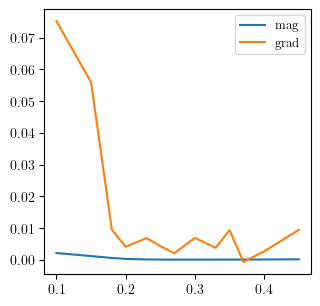

In [118]:
plt.plot(dist[:], (en_mag + en_mag_u - 2 * en_mag_v)[:], label = 'mag')
plt.plot(dist[:], (en_f1 + en_f2 + en_f1_u + en_f2_u - 2 * en_f1_v - 2 * en_f2_v)[:], label = 'grad')
#plt.plot(dist[:], (en_f1 + en_f1_u - 2 * en_f1_v)[:], label = 'f1')
#plt.plot(dist[:], (en_f2 + en_f2_u - 2 * en_f2_v)[:], label = 'f2')
plt.legend()
plt.show()

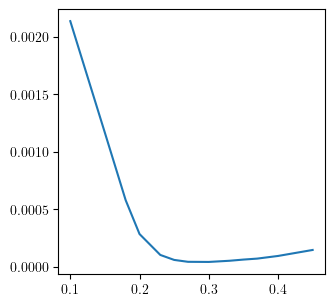

In [122]:
plt.plot(dist[:], (en_mag + en_mag_u - 2 * en_mag_v)[:], label = 'mag')

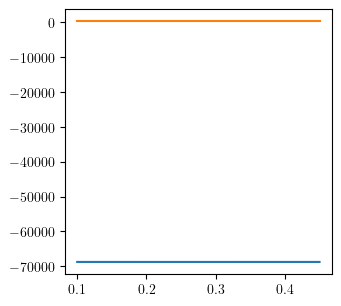

In [121]:
plt.plot(dist[:], (en_f1)[:], label = 'mag')
plt.plot(dist[:], (en_f2)[:], label = 'mag')

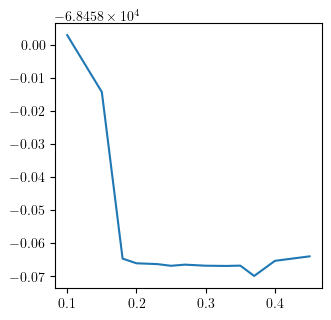

In [109]:
plt.plot(dist[:], (energies)[:], label = 'total')
#plt.plot(dist[:], (en_mag)[:], label = 'mag')
#plt.plot(dist[:], (en_f1)[:], label = 'mag')

In [101]:
import matplotlib
from matplotlib import pyplot as plt

In [102]:
dist

array([0.1 , 0.15, 0.18, 0.2 , 0.23, 0.25, 0.27, 0.3 , 0.33, 0.35, 0.37,
       0.4 , 0.45])

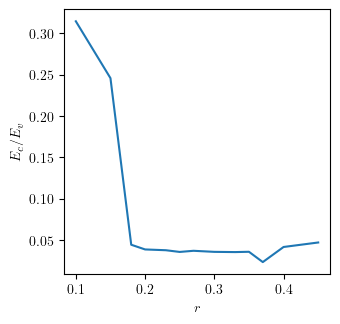

In [103]:
plt.plot(dist[:], (energies - e_v * 2 + e_u)[:] / np.abs(e_u - e_v), label = 'total')
plt.plot(dist[:], (energies - e_v * 2 + e_u)[:] / np.abs(e_u - e_v), label = 'total')
plt.ylabel(r'$E_c / E_{v}$')
#plt.yscale('log')
plt.xlabel(r'$r$')
plt.savefig('images/energy_dep.pdf', bbox_inches='tight')